# The Task

Import, explore, clean, standardize, and model the King County House Sales dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

We want to know the underlying influencers on sale price, and how they can be adjusted in order to increase or decrease the final measured quantity. Such metrics would include p-values associated with the various features, comparing models, and investigating potential multicollinarity in the model. Multicollinearity also touches upon checking model assumptions.

# Importing the Dataset

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')

# Understanding the Dataset

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Visualizing the Dataset

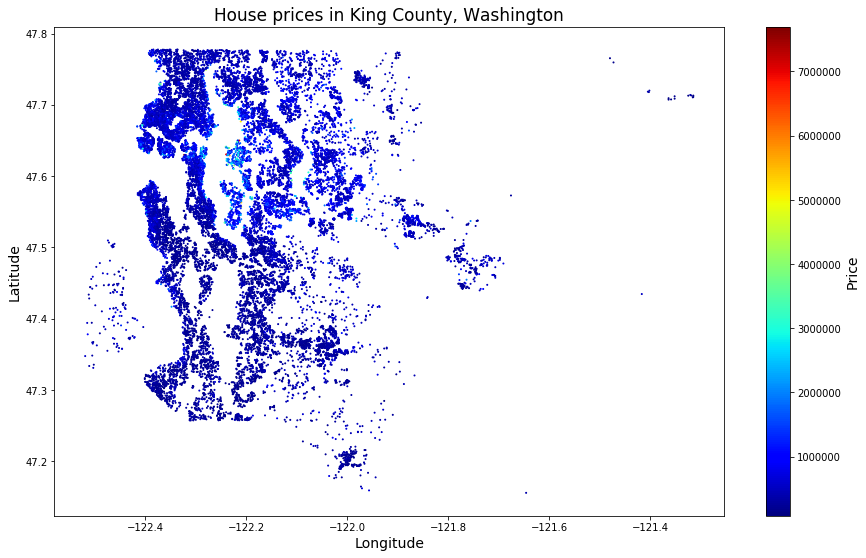

In [6]:
plt.figure(figsize = (15,9))
plt.scatter(df['long'], df['lat'], c=df['price'], cmap = plt.get_cmap('jet'), s=1)
plt.colorbar().set_label('Price', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.title('House prices in King County, Washington', fontsize=17)
plt.show()

# Hypotheses

### **Alternative Hypothesis**:
There is a multivariate relationship between the price of a house and its total square feet, the number of bedrooms, bathrooms, year built and renovated, zipcode, and the lat and longitude.

### **Null Hypothesis**: 
There is no relationship between these variables.

# Methodology & Approach
This will be a supervised learning task with a plain batch. Instances are labeled with predictor values corresponding to a target variable. Furthermore, this will be a regression analysis where I will predict values. And since this dataset has multiple predictor values for a single target variable, this will be a multivariate regression.

# Performance Measure

For this regression analysis, I will be using the Root Mean Squre Error to get an idea of how much error my model makes in its predictions prices.

### Question 1: What are my assumptions? Is my data decribed by these assumptions?

Normality, Homoscedasticity, and a linear relationship between the predictors and the target variable are all assumptions that must hold true for a Linear Regression to be successful. Using certain visualizations, I can check to see if my data follows a normal distribution and if the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables, and finally if a linear relation exists between these variables and my target, 'price'.

I can begin to check for normality by visualizing the distribution curves of my data.

### Question 1a. Is my data normally distributed?

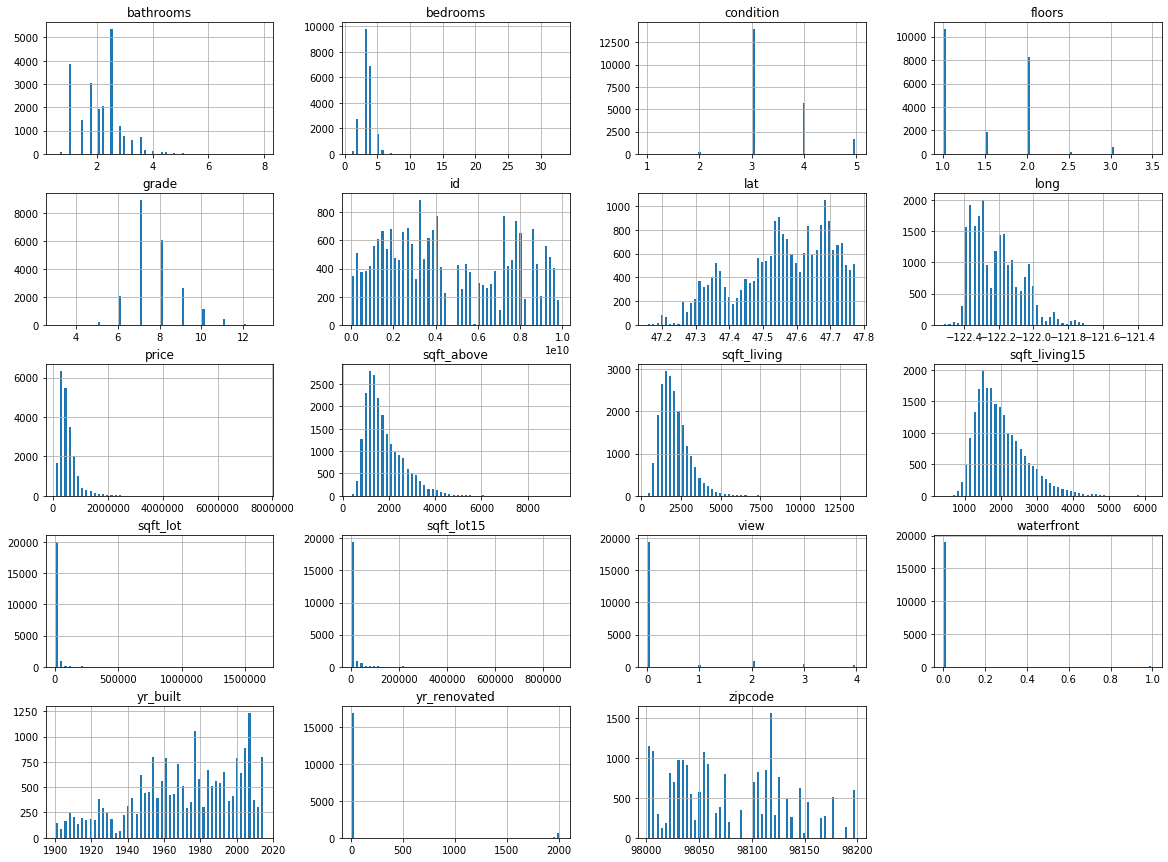

In [7]:
df.hist(bins=50, figsize=(20,15), rwidth=0.5);

Most of my data is not normally distributed. Features such as 'bathrooms', 'bedrooms', 'price', 'sqft_living' all show some level of skewness; some more so than others. In order to perform a linear regression, I will have to normalize these features with MinMax scaling, Log Transformations, or both.

# Understanding Correlation

### Question 2: Which attributes have the highest correlation?

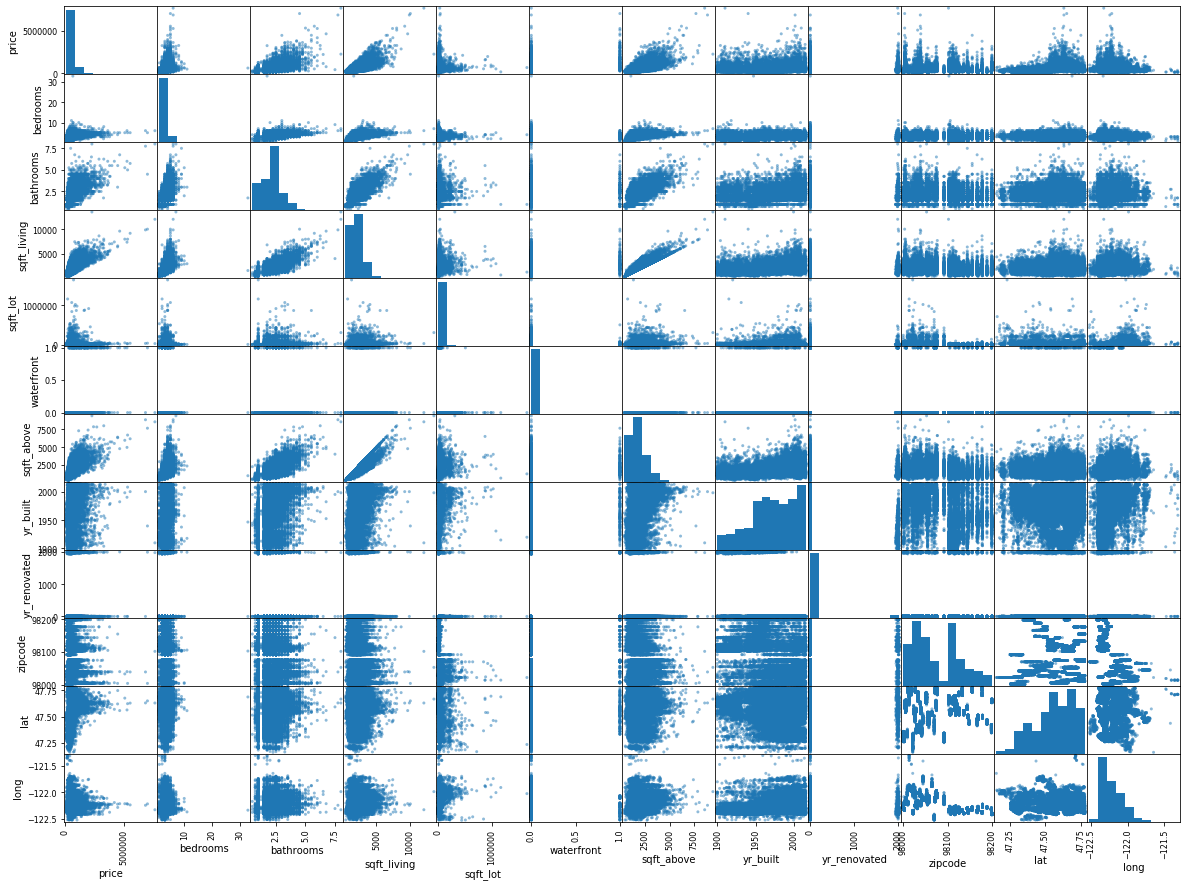

In [8]:
from pandas.plotting import scatter_matrix

attributes = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
              'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 
              'yr_renovated', 'zipcode', 'lat', 'long']
scatter_matrix(df[attributes], figsize=(20,15));

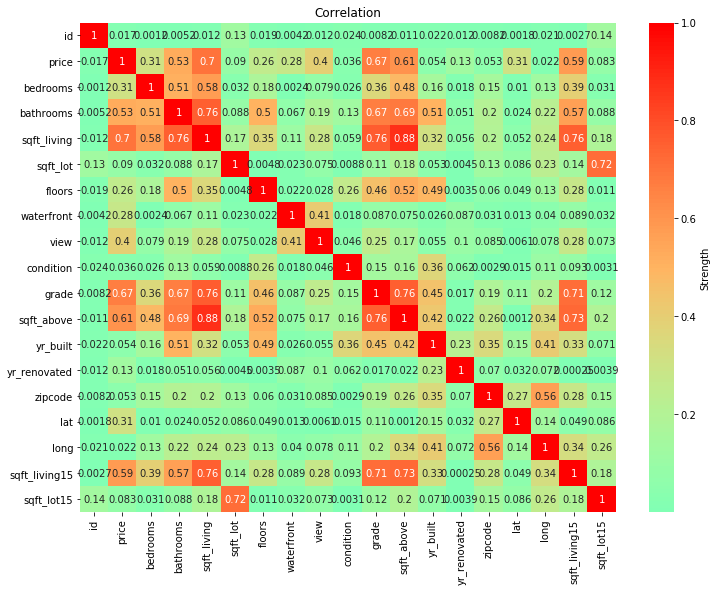

In [57]:
plt.figure(figsize=(12,9))
plt.title('Correlation')
#plt.colorbar().set_label('Strength', fontsize=14)
sns.heatmap(df.corr().abs(), center=0, annot=True, cmap='rainbow', cbar_kws={'label': 'Strength'});

# Workaround for a bug that cut off half of the top and bottom cells
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show;

In [10]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [11]:
corr_matrix['sqft_living'].sort_values(ascending=False)

sqft_living      1.000000
sqft_above       0.876448
grade            0.762779
sqft_living15    0.756402
bathrooms        0.755758
price            0.701917
bedrooms         0.578212
floors           0.353953
yr_built         0.318152
view             0.282532
long             0.241214
sqft_lot15       0.184342
sqft_lot         0.173453
waterfront       0.110230
yr_renovated     0.055660
lat              0.052155
id              -0.012241
condition       -0.059445
zipcode         -0.199802
Name: sqft_living, dtype: float64

In [12]:
corr_matrix['grade'].sort_values(ascending=False)

grade            1.000000
sqft_living      0.762779
sqft_above       0.756073
sqft_living15    0.713867
price            0.667951
bathrooms        0.665838
floors           0.458794
yr_built         0.447865
bedrooms         0.356563
view             0.249727
long             0.200341
sqft_lot15       0.120981
sqft_lot         0.114731
lat              0.113575
waterfront       0.087383
yr_renovated     0.016669
id               0.008188
condition       -0.146896
zipcode         -0.185771
Name: grade, dtype: float64

### Question 1b: Does there appear to be a linear relationship between my predictors and my target variable 'price'?

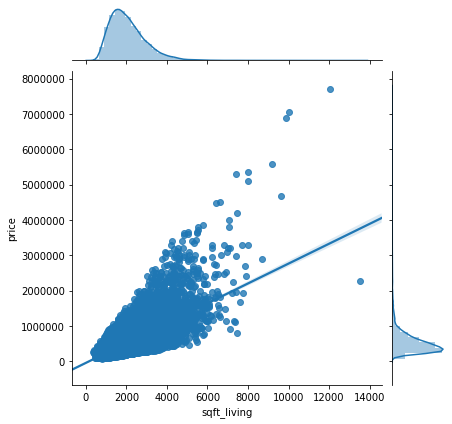

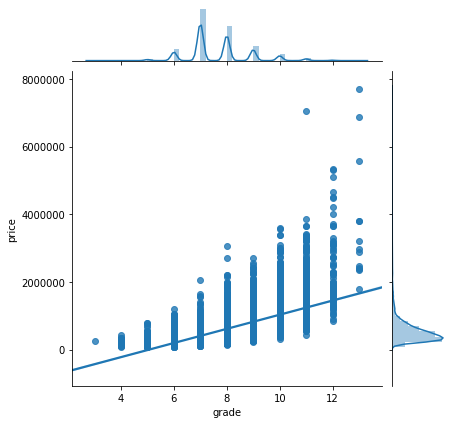

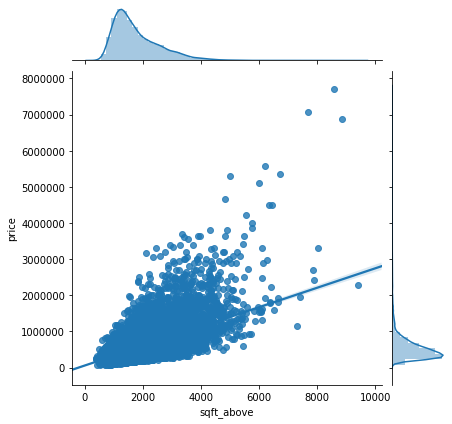

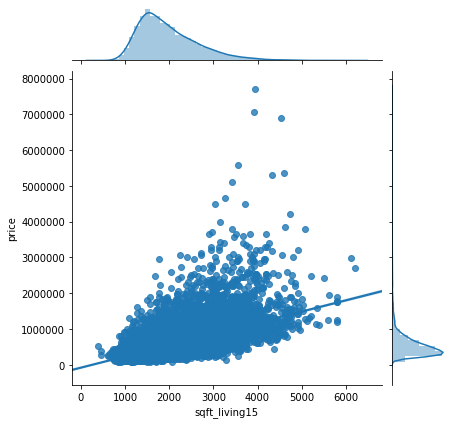

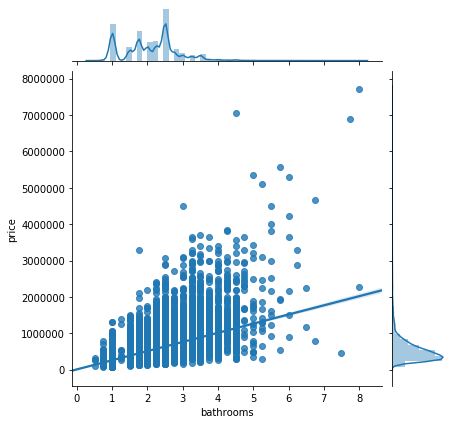

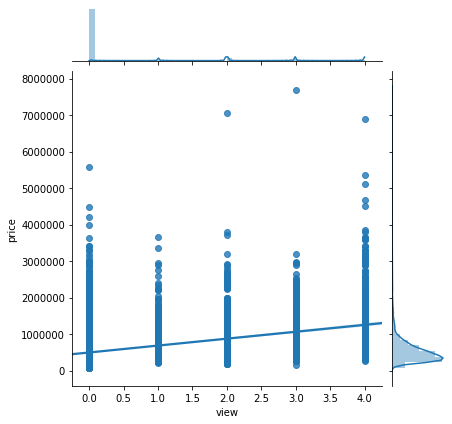

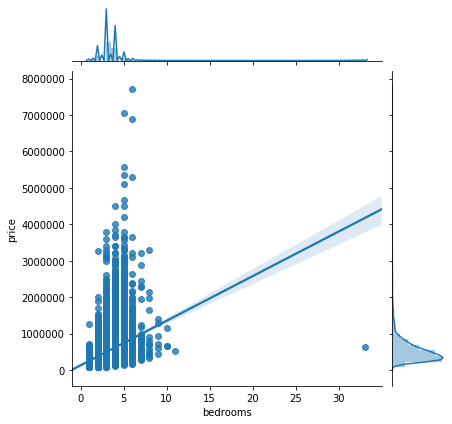

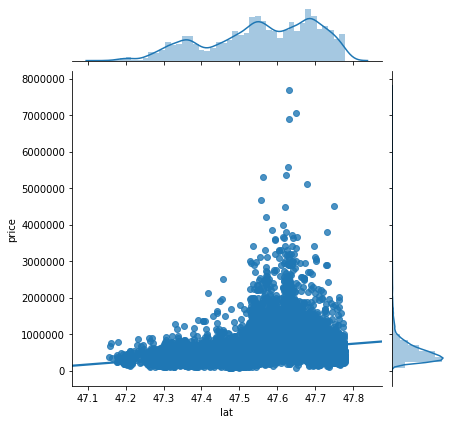

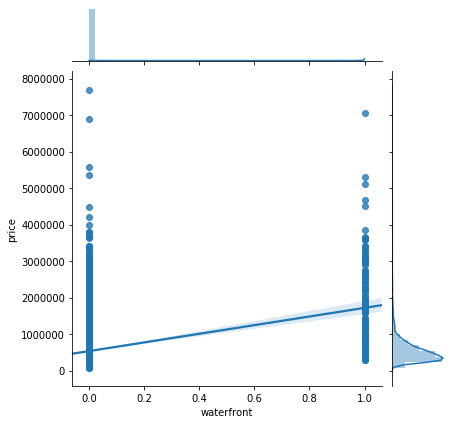

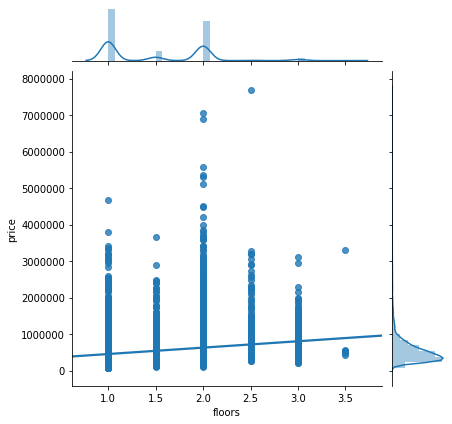

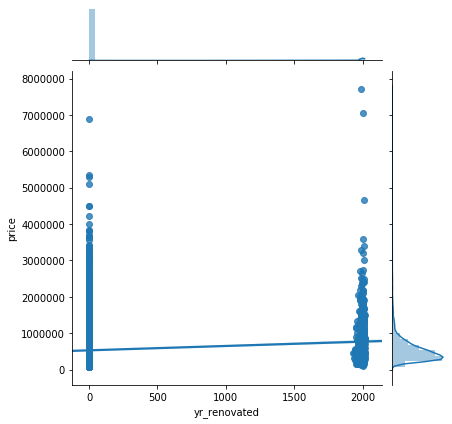

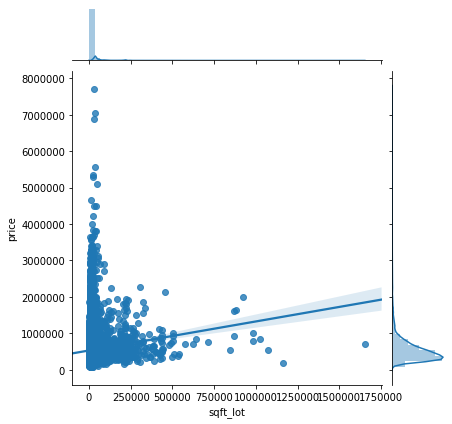

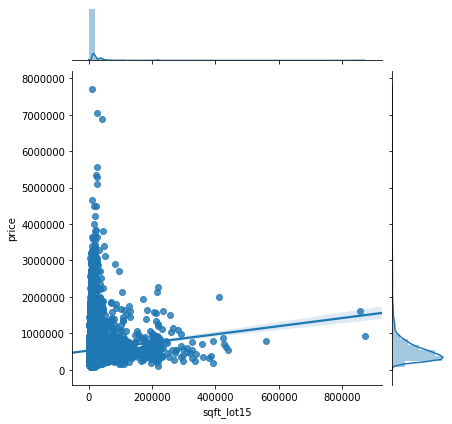

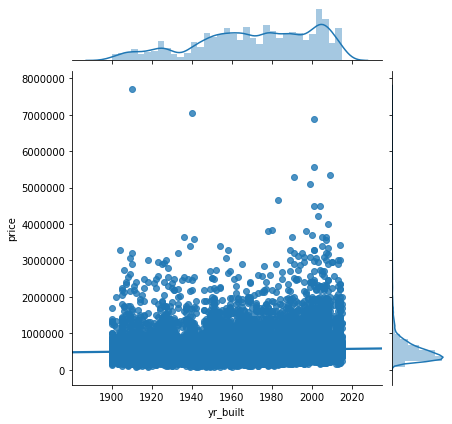

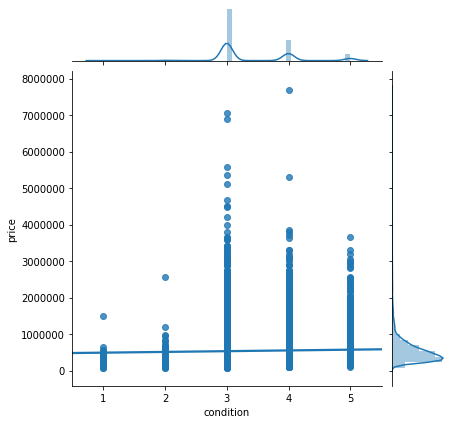

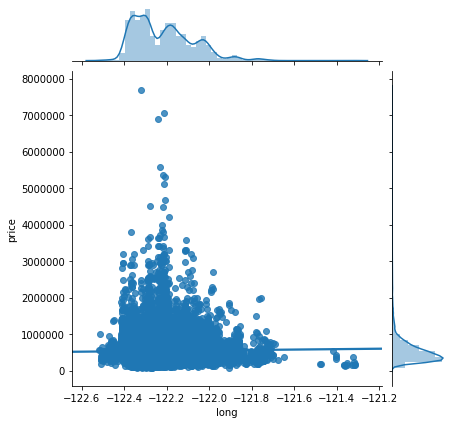

In [13]:
correlations = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
                'view', 'bedrooms', 'lat', 'waterfront', 'floors', 'yr_renovated',
                'sqft_lot', 'sqft_lot15', 'yr_built', 'condition', 'long']
for element in correlations:
    sns.jointplot(element, 'price', data=df, kind='reg');

# Data Cleaning 
# Checking for and removing Null/NaN values

In [14]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
obj_l = []
for col in df.columns:
    if df[col].dtype == object:
        obj_l.append(col)
obj_l

['date', 'sqft_basement']

### Populating empty cells with Median values

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df2 = df.drop(['date', 'sqft_basement', 'id', 'zipcode'], axis=1)

imputer.fit(df2)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [17]:
x = imputer.transform(df2)
clean_df = pd.DataFrame(x, columns=df2.columns, index=df2.index)
clean_df.head()
clean_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Z-Testing, Masking to remove Outliers

In [18]:
#def get_zscores(arr):
 #   return (arr.mean - arr)/arr.std()

#price_zscores = get_zscores(df_final['price'])
#price_zscores

In [19]:
#sizes = price_zscores.abs()*50
#plt.scatter(sqft_living, df_final['price'], sizes=price_zcores)

In [20]:
from scipy import stats

predictors = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
              'view', 'condition', 'grade', 'sqft_above','yr_built', 'yr_renovated', 'lat', 'long',
              'sqft_living15', 'sqft_lot15']

no_outliers={}
for predictor in predictors:
    z = np.abs(stats.zscore(clean_df[predictor]))
    predictor_outliers = np.where(z > 3)
    no_outliers[predictor] = predictor_outliers
    
#no_outliers

In [21]:
for predictor, predictor_outliers in no_outliers.items():
    for outlier in predictor_outliers:
        df_prepared = clean_df.drop(df.index[outlier], axis=0)
    
df_prepared.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,1955.0,0.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,1933.0,0.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,1965.0,0.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0


In [22]:
df_prepared.replace([np.inf, -np.inf], 0).dropna(subset=df_prepared.columns, how="all")
df_prepared.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,1955.0,0.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,1951.0,1991.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,1933.0,0.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,1965.0,0.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,1987.0,0.0,47.6168,-122.045,1800.0,7503.0


# Feature Normalization
Earlier, we made note that many distributions in the dataset were not normally distributed. In order to perform the best Linear Regression, we will need to perform Log Transformations to make these features normally distributed.

In [23]:
housing_features = df_prepared.drop(['price'], axis=1)
list(housing_features.columns)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [24]:
df_with_log = df.copy()
for col in df.columns:
    new_col_name = "_".join(["log", column])
    df_with_log[new_col_name] = np.log(df[column])

NameError: name 'column' is not defined

In [ ]:
#Log Transformations
logbedrooms = np.log(housing_features['bedrooms'])
logbathrooms = np.log(housing_features['bathrooms'])
logsqft_living = np.log(housing_features['sqft_living'])
logfloors = np.log(housing_features['floors'])
logwaterfront = np.log(housing_features['waterfront'])
logview = np.log(housing_features['view'])
logcondition = np.log(housing_features['condition'])
loggrade = np.log(housing_features['grade'])
logsqft_above = np.log(housing_features['sqft_above'])
logyr_built = np.log(housing_features['yr_built'])
logyr_renovated = np.log(housing_features['yr_renovated'])
loglat = np.log(housing_features['lat'])
loglong = np.log(housing_features['long'])
logsqft_living15 = np.log(housing_features['sqft_living15'])
logsqft_lot15 = np.log(housing_features['sqft_lot15'])

#Min-Max Scaling
housing_features['bedrooms'] = (logbedrooms-min(logbedrooms))/(max(logbedrooms)-min(logbedrooms))
housing_features['bathrooms'] = (logbathrooms-min(logbathrooms))/(max(logbathrooms)-min(logbathrooms))
housing_features['sqft_living'] = (logsqft_living-min(logsqft_living))/(max(logsqft_living)-min(logsqft_living))
housing_features['floors'] = (logfloors-min(logfloors))/(max(logfloors)-min(logfloors))
housing_features['waterfront'] = (logwaterfront-min(logwaterfront))/(max(logwaterfront)-min(logwaterfront))
housing_features['view'] = (logview-min(logview))/(max(logview)-min(logview))
housing_features['condition'] = (logcondition-min(logcondition))/(max(logcondition)-min(logcondition))
housing_features['grade'] = (loggrade-min(loggrade))/(max(loggrade)-min(loggrade))
housing_features['sqft_above'] = (logsqft_above-min(logsqft_above))/(max(logsqft_above)-min(logsqft_above))
housing_features['yr_built'] = (logyr_built-min(logyr_built))/(max(logyr_built)-min(logyr_built))
housing_features['yr_renovated'] = (logyr_renovated-min(logyr_renovated))/(max(logyr_renovated)-min(logyr_renovated))
housing_features['lat'] = (loglat-min(loglat))/(max(loglat)-min(loglat))
housing_features['long'] = (loglong-min(loglong))/(max(loglong)-min(loglong))
housing_features['sqft_living15'] = (logsqft_living15-min(logsqft_living15))/(max(logsqft_living15)-min(logsqft_living15)) 
housing_features['sqft_lot15'] = (logsqft_lot15-min(logsqft_lot15))/(max(logsqft_lot15)-min(logsqft_lot15))

housing_features.hist(bins=50, figsize=(20,15), rwidth=0.5);

# Creating Training and Test Sets & Verifying Stratified Sampling

In [25]:
df_final = df_prepared.loc[:, ['price','sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'bedrooms']].astype(int).reset_index()
#df_final = housing_features.loc[:, ['bathrooms', 'bedrooms', 'grade', 'lat', 'sqft_above', 'sqft_living', 'sqft-living15', 'sqft_lot15', 'yr_built']].astype(int).reset_index()
df_final.head()                             
                                

,index,price,sqft_living,grade,sqft_living15,bathrooms,bedrooms
0,0,221900,1180,7,1340,1,3
1,1,538000,2570,7,1690,2,3
2,2,180000,770,6,2720,1,2
3,3,604000,1960,7,1360,3,4
4,4,510000,1680,8,1800,2,3


In [26]:
df_final['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21229    1530
21230    2310
21231    1020
21232    1600
21233    1020
Name: sqft_living, Length: 21234, dtype: int64

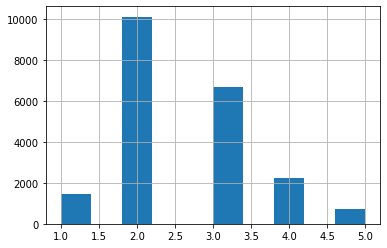

In [27]:
df_final['sqft_cat'] = pd.cut(df_final['sqft_living'], bins=[0, 1000, 2000, 3000, 4000, np.inf], 
                                labels=[1,2,3,4,5])
df_final['sqft_cat'].hist();

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_final, df_final['sqft_cat']):
    strat_train_set= df_final.loc[train_index]
    strat_test_set = df_final.loc[test_index]
    
len(strat_train_set), len(strat_test_set)

(16987, 4247)

### Question 3: Are my training and test sets representative of my dataset as a whole?

In [29]:
strat_test_set['sqft_cat'].value_counts()/len(strat_test_set)

2    0.476807
3    0.314575
4    0.104780
1    0.069461
5    0.034377
Name: sqft_cat, dtype: float64

In [30]:
df_final['sqft_cat'].value_counts()/len(df)

2    0.468861
3    0.309163
4    0.103024
1    0.068297
5    0.033847
Name: sqft_cat, dtype: float64

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('sqft_cat', axis=1, inplace=True)

In [32]:
strat_test_set.head()

,index,price,sqft_living,grade,sqft_living15,bathrooms,bedrooms
11161,11354,325000,2110,8,2100,2,4
16550,16842,333000,720,6,1200,1,2
12268,12486,627250,2830,9,2970,2,4
18167,18492,545000,1610,7,1510,2,3
14344,14607,350000,1860,8,2450,2,3


# Training the Model
### Question 4: Given chosen predictors, can I use Linear Regression Model to predict target values?

In [33]:
train_predictors = strat_train_set.drop('price', axis=1)
train_labels = strat_train_set['price'].copy()

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(train_predictors, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [35]:
#Defining the problem
#outcome = 'price'
#x_cols = list(df.columns)
#x_cols.remove(outcome)
#Fitting the actual model
#predictors = "+".join(x_cols)
#formula = outcome + '~' + predictors
#model = sm.OLS(formula=formula, data=train_predictors).fit()
#model.summary()

In [36]:
five_predictions = train_predictors[:5]
five_labels = train_labels[:5]
print('Predictions:', lin_reg.predict(five_predictions))

Predictions: [911020.2683863  327292.63564265 390297.06328867 617209.95915804
 325582.91031529]


In [37]:
print('Labels:', list(five_labels))

Labels: [1240000, 774900, 175000, 575000, 347000]


### Question 5: What is the measure of error in my Linear Regression?

In [38]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
price_predictions = lin_reg.predict(train_predictors)
lin_mse = mean_squared_error(train_labels, price_predictions)
lin_rmse = np.sqrt(lin_mse)
print('Mean Absolute Error:', metrics.mean_absolute_error(price_predictions, train_labels))  
print('Mean Squared Error:', metrics.mean_squared_error(price_predictions, train_labels)) 
print('Root Mean Square Error:', lin_rmse)
print('Coefficients: \n', lin_reg.coef_)

Mean Absolute Error: 161944.14300762472
Mean Squared Error: 59595904133.72972
Root Mean Square Error: 244122.7235095695
Coefficients: 
 [-1.34567698e+00  1.96388429e+02  9.14024322e+04  2.37531315e+01
  5.14170028e+03 -4.08014181e+04]


# Plot the Linear Regression

Slope: 0.5380011063203787
Y-Intercept: 247798.54133342483


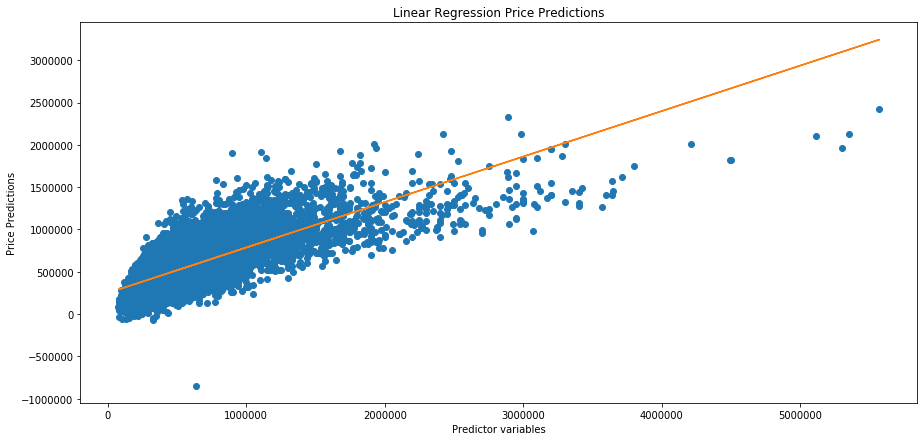

In [40]:
plt.figure(figsize=(15,7))
plt.xlabel('Predictor variables')
plt.ylabel('Price Predictions')
plt.title('Linear Regression Price Predictions')

x = np.array(train_labels)
y = np.array(price_predictions)

m, b = np.polyfit(x, y, 1)

print('Slope:', m)
print('Y-Intercept:', b)

plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.show()

# Plot Actual vs. Predicted Values

In [41]:
linear_results = pd.DataFrame({'Actual': train_labels, 'Predicted': price_predictions})
twenty_five_results = linear_results[:25]

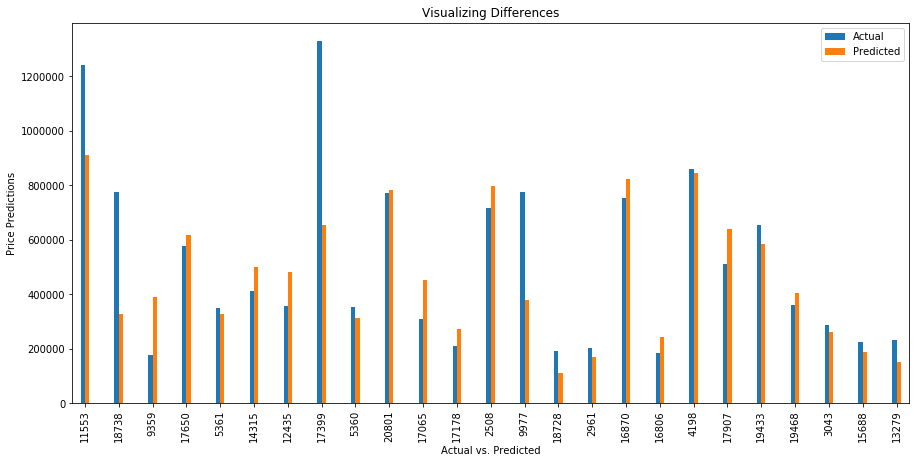

In [43]:
twenty_five_results.plot(kind='bar', width=.25, figsize=(15,7))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Actual vs. Predicted')
plt.ylabel('Price Predictions')
plt.title('Visualizing Differences')
plt.show()

# Plot the Residuals

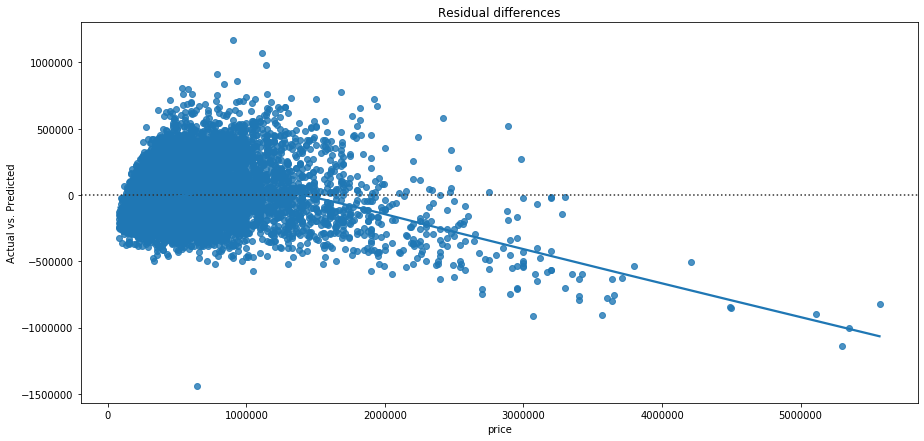

In [56]:
# Plot the residuals after fitting a linear model
plt.figure(figsize=(15,7))
plt.title('Residual differences')
plt.xlabel('Predictor variables')
plt.ylabel('Actual vs. Predicted')
sns.residplot(train_labels, price_predictions, lowess=True);

### Question 1c: Are my residuals homoscedastic?
Unfortunately, no. The errors derived from my Linear Regression are not even among the independent and dependent variables. This means that the "noise" generated in my model is not homoscedastic, but heteroscedastic.

# Cross Validation, k-fold approach

One way to evaluate would be to use the train_test_split method to split the training set into smaller training set and validation set, then train models agains thte smaller training set and evaluate them against the validation set.

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, train_predictors, train_labels, scoring='neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)
print('Scores:', scores)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Scores: [-5.46778477e+10 -6.20996899e+10 -5.95477509e+10 -5.70706802e+10
 -5.86089034e+10 -6.09408625e+10 -6.20314693e+10 -6.34915225e+10
 -5.87409463e+10 -5.98047297e+10]
Mean: -59701440229.73035
Standard Deviation: 2477688089.518257


### OLS Regression

In [46]:
import statsmodels.api as sm
model = sm.OLS(train_labels,train_predictors)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          1.608e+04
Date:                Thu, 05 Mar 2020   Prob (F-statistic):                        0.00
Time:                        09:17:22   Log-Likelihood:                     -2.3522e+05
No. Observations:               16987   AIC:                                  4.705e+05
Df Residuals:                   16981   BIC:                                  4.705e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
index            -2.4227      0.307     -7.881      0.000      -3.025      -1.820
sqft_living     257.3150      3.974     64.755      0.000     249.526     265.104
grade          2.637e+04   1441.582     18.290      0.000    2.35e+04    2.92e+04
sqft_living15    30.1597      4.586      6.577      0.000      21.171      39.148
bathrooms       1.37e+04   3740.105      3.663      0.000    6369.376     2.1e+04
bedrooms      -7.365e+04   2292.119    -32.134      0.000   -7.81e+04   -6.92e+04
==============================================================================
Omnibus:                    11170.800   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           280217.846
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      22.104   Cond. No.                     2.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion:
My alternate hypothesis was only partially correct. 'Sqft_Living' was the greatest predictor for my target variable, 'price'. Creating a Linear Regression, my values predicted remained around $244,122 off of the actual target value. This means that my model underfits my data, and that my features do not provide enough information to make good predictions.

# Recommendations:
I can improve the fit of this model by various means. I could create a polynomial regression, by creating more features from the features provided. I could also generate better features by performing a Grid Search. Or, I could turn to "Ensemble Learning" and use other models in concert with my Linear Regression model to measure the degree of error between each, and adjust accordingly. Other models I could use would be the Decision Tree Regressor, or the Random Forest Regressor.